In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [296]:
df_it = pd.read_excel('date_it_lemm.xlsx')
df_math = pd.read_excel('date_math_lemm.xlsx')
df_med = pd.read_excel('date_med_lemm.xlsx')
df_phys = pd.read_excel('date_physics_lemm.xlsx')

In [297]:
df = pd.concat([df_it, df_math, df_med, df_phys])

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8567 entries, 0 to 2174
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8567 non-null   int64  
 1   title          8567 non-null   object 
 2   link           8567 non-null   object 
 3   annotation     8567 non-null   object 
 4   authors        8567 non-null   object 
 5   text           8567 non-null   object 
 6   UDK            5774 non-null   object 
 7   ESCI           8567 non-null   int64  
 8   GeoRef         8567 non-null   int64  
 9   ВАК            8567 non-null   int64  
 10  -              8567 non-null   int64  
 11  RSCI           8567 non-null   int64  
 12  WOS            8567 non-null   int64  
 13  AGRIS          8567 non-null   int64  
 14  PubMed         8567 non-null   int64  
 15  MathSciNet     4343 non-null   float64
 16  Scopus         8567 non-null   int64  
 17  zbMATH         4343 non-null   float64
 18  CAS          

In [247]:
df = df[["title", "annotation", 'topic']]

### TITLE

Классификация с использованием только названия статьи.

#### Label encoding
Использую label т.к тема является целевым значением, которое буду предсказывать

In [12]:
encoder = OrdinalEncoder()
df[['topic']] = encoder.fit_transform(df[['topic']])
df

,title,annotation,topic
0,Проблема обработки данных георадиолокационных ...,в статье рассматривается проблема обработки да...,0.0
1,Understanding and designing modern high-reliab...,the purpose of this paper is to describe as Sp...,0.0
2,разработка аутентификационной модели для обл...,рассмотрены методы и модели безопасного исполь...,0.0
3,Разработка модели информационных потоков в сис...,в данной работе представлена модель информаци...,0.0
4,Автоматизированная система управления солнечны...,в данной статье рассмотрена возможность приме...,0.0
...,...,...,...
2170,О чандлеровском движении,"Доказано, что утверждение о существовании «ост...",3.0
2171,Композитные материалы – новое направление разв...,В статье подведены итоги XIV Всероссийской мол...,3.0
2172,Использование когерентного синхротронного излу...,В работе описывается метод диагностики нанонео...,3.0
2173,Влияние легирования церием на параметры энерге...,В работе проведен анализ температурных и конце...,3.0


Попробую использовать разные способы векторизации текста и разные модели машинного обучения.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df.title, df.topic,
                                                    test_size=0.33, random_state=42)

In [64]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)

(8567, 3)
(5739,)
(2828,)


#### CountVectorizer (bag of words)

считает встречаемость слов в документе. Под документом может подразумеваться предложение, абзац, пост или комментарий. Результатом применения CountVectorizer являются разреженные вектора (sparse vectors), причём значения сортированы согласно частоте встречаемости слова.

In [20]:
vec = CountVectorizer(ngram_range=(1,1))
bow = vec.fit_transform(X_train)

##### LogisticRegression

In [41]:
clf = LogisticRegression(random_state=7) #по умолчанию multi_class=”auto”
clf.fit(bow, y_train)

LogisticRegression(random_state=7)

In [43]:
pred = clf.predict(vec.transform(X_test))
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.78       810
         1.0       0.63      0.65      0.64       626
         2.0       0.87      0.87      0.87       669
         3.0       0.77      0.76      0.77       723

    accuracy                           0.77      2828
   macro avg       0.76      0.76      0.76      2828
weighted avg       0.77      0.77      0.77      2828



    0 - it
    1 - math
    2 - med
    3 - physics

Просела точность прогнозирования математики (0.62), а вот медицина показывает хорошую точность: 0.88. Но, в целом, даже с таким простейшим способом векторизации текстов, используя только заголовки статей и прогнозируя с логистической регрессии, показан хороший результат.

##### DesisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=7)
clf.fit(bow, y_train)

DecisionTreeClassifier(random_state=7)

In [30]:
pred = clf.predict(vec.transform(X_test))
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.65      0.66      0.65       786
         1.0       0.59      0.46      0.52       817
         2.0       0.72      0.69      0.70       708
         3.0       0.48      0.66      0.55       517

    accuracy                           0.61      2828
   macro avg       0.61      0.62      0.61      2828
weighted avg       0.62      0.61      0.61      2828



##### KNeighborsClassifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(bow, y_train)

KNeighborsClassifier()

In [36]:
pred = clf.predict(vec.transform(X_test))
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.72      0.46      0.56      1251
         1.0       0.11      0.58      0.19       122
         2.0       0.47      0.51      0.49       620
         3.0       0.46      0.40      0.43       835

    accuracy                           0.46      2828
   macro avg       0.44      0.49      0.42      2828
weighted avg       0.56      0.46      0.49      2828



##### LogisticRegressionCV

 автоматически выполняет кросс-валидацию для подбора оптимального гиперпараметра C (обратная сила регуляризации)

In [49]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(random_state=7) #по умолчанию multi_class=”auto”
clf.fit(bow, y_train)

LogisticRegressionCV(random_state=7)

In [51]:
pred = clf.predict(vec.transform(X_test))
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       803
         1.0       0.64      0.62      0.63       666
         2.0       0.87      0.88      0.87       664
         3.0       0.76      0.78      0.77       695

    accuracy                           0.77      2828
   macro avg       0.77      0.77      0.77      2828
weighted avg       0.77      0.77      0.77      2828



##### SVC

In [66]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(bow, y_train)

SVC()

In [68]:
pred = clf.predict(vec.transform(X_test))
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76       861
         1.0       0.66      0.56      0.60       760
         2.0       0.75      0.84      0.79       594
         3.0       0.68      0.79      0.73       613

    accuracy                           0.72      2828
   macro avg       0.72      0.73      0.72      2828
weighted avg       0.72      0.72      0.72      2828



##### StackingClassifier: DecisionTreeClassifier, RandomForestClassifier, LinearSVC

In [74]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

Classifier = StackingClassifier([
     ('DecisionTreeClassifier', DecisionTreeClassifier()),
     ('RandomForestClassifier', RandomForestClassifier()),
     ('LinearSVC', LinearSVC())
 ])

In [80]:
Classifier.fit(bow, y_train)

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier()),
                               ('RandomForestClassifier',
                                RandomForestClassifier()),
                               ('LinearSVC', LinearSVC())])

In [93]:
predictions_stacking = Classifier.predict(vec.transform(X_test))

In [95]:
print(classification_report(predictions_stacking,y_test))

              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77       781
         1.0       0.62      0.61      0.62       652
         2.0       0.89      0.85      0.87       697
         3.0       0.76      0.78      0.77       698

    accuracy                           0.76      2828
   macro avg       0.76      0.76      0.76      2828
weighted avg       0.76      0.76      0.76      2828



##### RandomForestClassifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=50, random_state=10) #n_estomators - кол-во моделей
clf_forest.fit(bow, y_train)

RandomForestClassifier(n_estimators=50, random_state=10)

In [97]:
pred = clf_forest.predict(vec.transform(X_test))
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.74      0.69      0.71       868
         1.0       0.49      0.69      0.57       450
         2.0       0.75      0.79      0.77       643
         3.0       0.71      0.58      0.64       867

    accuracy                           0.68      2828
   macro avg       0.67      0.69      0.67      2828
weighted avg       0.69      0.68      0.68      2828



##### Вывод:

In [103]:
tabledata = [["LogisticRegression", 0.77, 0.76, 0.77],
         ["DecisionTreeClassifier", 0.61, 0.61, 0.61],
         ["KNeighborsClassifier", 0.46, 0.42, 0.49],
         ["LogisticRegressionCV", 0.77,0.77,0.77],
         ["SVC",0.72, 0.72, 0.72],
         ["StackingClassifier", 0.76,0.76,0.76],
         ['RandomForestClassifier', 0.68, 0.67, 0.68]]
pd.DataFrame(tabledata, columns=["model","accuracy", "macro_avg", 'weighted_avg'])

,model,accuracy,macro_avg,weighted_avg
0,LogisticRegression,0.77,0.76,0.77
1,DecisionTreeClassifier,0.61,0.61,0.61
2,KNeighborsClassifier,0.46,0.42,0.49
3,LogisticRegressionCV,0.77,0.77,0.77
4,SVC,0.72,0.72,0.72
5,StackingClassifier,0.76,0.76,0.76
6,RandomForestClassifier,0.68,0.67,0.68


В векторизации текста с помощью мешка слов лучший результат показала модель LogisticRegressionCV.

#### TF-IDF

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
vectorizer = TfidfVectorizer(max_features=5000)  # Можно настроить количество фич
X = vectorizer.fit_transform(df['title'])

In [112]:
y = df['topic']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### RandomForestClassifier

In [116]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [118]:
y_pred = model.predict(X_test)

In [120]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74       504
         1.0       0.52      0.63      0.57       317
         2.0       0.80      0.79      0.79       416
         3.0       0.72      0.66      0.69       477

    accuracy                           0.70      1714
   macro avg       0.70      0.70      0.70      1714
weighted avg       0.71      0.70      0.71      1714



##### LogisticRegression

In [124]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [126]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80       493
         1.0       0.58      0.66      0.62       337
         2.0       0.87      0.86      0.87       415
         3.0       0.78      0.74      0.76       469

    accuracy                           0.77      1714
   macro avg       0.76      0.76      0.76      1714
weighted avg       0.77      0.77      0.77      1714



##### LogisticRegressionCV

In [138]:
model = LogisticRegressionCV(random_state=2) #по умолчанию multi_class=”auto”
model.fit(X_train, y_train)

LogisticRegressionCV(random_state=2)

In [142]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79       479
         1.0       0.61      0.62      0.62       372
         2.0       0.88      0.88      0.88       406
         3.0       0.79      0.76      0.77       457

    accuracy                           0.77      1714
   macro avg       0.77      0.77      0.77      1714
weighted avg       0.77      0.77      0.77      1714



##### StackingClassifier:  RandomForestClassifier, SVC,  LogisticRegression

In [148]:
from sklearn.preprocessing import StandardScaler
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', make_pipeline(StandardScaler(with_mean=False), SVC(kernel='linear', probability=True, random_state=42))),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]
meta_model = LogisticRegressionCV(max_iter=1000, random_state=42)
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model, cv=5)

In [150]:
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('svm',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler(with_mean=False)),
                                                ('svc',
                                                 SVC(kernel='linear',
                                                     probability=True,
                                                     random_state=42))])),
                               ('lr',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42))],
                   final_estimator=LogisticRegressionCV(max_iter=1000,
                                                        random_state=42))

In [156]:
y_pred = stacking_model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.79      0.79       477
         1.0       0.61      0.64      0.62       360
         2.0       0.87      0.88      0.87       404
         3.0       0.80      0.75      0.77       473

    accuracy                           0.77      1714
   macro avg       0.76      0.76      0.76      1714
weighted avg       0.77      0.77      0.77      1714



##### Вывод:

In [162]:
tabledata = [["RandomForestClassifier", 0.70, 0.70, 0.71],
         ["LogisticRegression", 0.77, 0.76, 0.77],
         ["LogisticRegressionCV", 0.77, 0.77, 0.77],
         ["StackingClassifier", 0.77,0.76,0.77]]
pd.DataFrame(tabledata, columns=["model","accuracy", "macro_avg", 'weighted_avg'])

,model,accuracy,macro_avg,weighted_avg
0,RandomForestClassifier,0.70,0.70,0.71
1,LogisticRegression,0.77,0.76,0.77
2,LogisticRegressionCV,0.77,0.77,0.77
3,StackingClassifier,0.77,0.76,0.77


Абсолютно такие же результаты, как в случае векторизации с помощью мешка слов.

#### Word2vec

##### Токенизация

In [190]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import numpy as np

In [172]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ksurashanti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [178]:
df['title_tokens'] = df['title'].apply(word_tokenize) #токенизация для дальнейшей обработки текста word2vec

In [184]:
word2vec_model = Word2Vec(sentences=df['title_tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [186]:
# Функция для преобразования текста в усредненный вектор Word2Vec
def text_to_vector(tokens, model, vector_size=100):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

In [192]:
# Преобразуем каждый заголовок в вектор
X = np.array([text_to_vector(tokens, word2vec_model) for tokens in df['title_tokens']])

In [194]:
y = df['topic'] #целевая переменная

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### RandomForestClassifier

In [198]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [202]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test)) #какой-то супер плохой результат...

              precision    recall  f1-score   support

         0.0       0.45      0.43      0.44       498
         1.0       0.34      0.39      0.36       336
         2.0       0.48      0.44      0.46       445
         3.0       0.40      0.40      0.40       435

    accuracy                           0.42      1714
   macro avg       0.42      0.42      0.42      1714
weighted avg       0.42      0.42      0.42      1714



##### LogisticRegressionCV

In [223]:
model = LogisticRegressionCV(random_state=10, max_iter=500) #по умолчанию multi_class=”auto”
model.fit(X_train, y_train)

LogisticRegressionCV(max_iter=500, random_state=10)

In [225]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.51      0.47      0.49       527
         1.0       0.38      0.45      0.41       323
         2.0       0.53      0.50      0.52       430
         3.0       0.43      0.44      0.43       434

    accuracy                           0.47      1714
   macro avg       0.46      0.47      0.46      1714
weighted avg       0.47      0.47      0.47      1714



##### Вывод:

In [230]:
tabledata = [["RandomForestClassifier", 0.42, 0.42, 0.42],
         ["LogisticRegressionCV", 0.47, 0.46, 0.47]]
pd.DataFrame(tabledata, columns=["model","accuracy", "macro_avg", 'weighted_avg'])

,model,accuracy,macro_avg,weighted_avg
0,RandomForestClassifier,0.42,0.42,0.42
1,LogisticRegressionCV,0.47,0.46,0.47


Супер плохой результат, не вижу смысла дальше пытаться классифицировать тексты векторизованные с помощью word2vec. TF-IDF тоже показало более плохой результат, чем CountVectorizer. Попробую расширить CountVectorizer.

### Title и annotation

In [261]:
from scipy.sparse import hstack

In [280]:
vectorizer_title = CountVectorizer(max_features=10000)
vectorizer_annotation = CountVectorizer(max_features=10000)

In [282]:
X_title = vectorizer_title.fit_transform(df['title'])
X_annotation = vectorizer_annotation.fit_transform(df['annotation'])

X = hstack([X_title, X_annotation])

y = df['topic']

##### RandomForestClassifier

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [286]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          IT       0.80      0.72      0.76       540
        math       0.52      0.66      0.58       300
         med       0.85      0.87      0.86       397
     physics       0.75      0.69      0.72       477

    accuracy                           0.73      1714
   macro avg       0.73      0.73      0.73      1714
weighted avg       0.75      0.73      0.74      1714



##### LogisticRegressionCV

In [288]:
model = LogisticRegressionCV(random_state=42)
model.fit(X_train, y_train)

LogisticRegressionCV(random_state=42)

In [290]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          IT       0.82      0.84      0.83       476
        math       0.71      0.74      0.72       367
         med       0.96      0.86      0.91       452
     physics       0.83      0.87      0.85       419

    accuracy                           0.83      1714
   macro avg       0.83      0.83      0.83      1714
weighted avg       0.83      0.83      0.83      1714



Отлично, смогла улучшить результат до 0.83. Попробую использовать и тексты статей:

### Title, annotation, text

In [300]:
df_it = pd.read_excel('date_it_lemm.xlsx')
df_math = pd.read_excel('date_math_lemm.xlsx')
df_med = pd.read_excel('date_med_lemm.xlsx')
df_phys = pd.read_excel('date_physics_lemm.xlsx')
df = pd.concat([df_it, df_math, df_med, df_phys])

In [304]:
df = df[["title", "annotation", 'text', 'topic']]

In [306]:
encoder = OrdinalEncoder()
df[['topic']] = encoder.fit_transform(df[['topic']]) #кодирую целевую переменную topic

In [313]:
vectorizer_title = CountVectorizer(max_features=5000)  
vectorizer_annotation = CountVectorizer(max_features=5000)
vectorizer_text = CountVectorizer(max_features=5000)

In [315]:
X_title = vectorizer_title.fit_transform(df['title'])
X_annotation = vectorizer_annotation.fit_transform(df['annotation'])
X_text = vectorizer_text.fit_transform(df['text'])

In [317]:
X = hstack([X_title, X_annotation, X_text])

In [319]:
y = df['topic']

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### RandomForestClassifier

In [327]:
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [329]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       486
         1.0       0.89      0.94      0.91       361
         2.0       1.00      0.98      0.99       418
         3.0       0.94      0.92      0.93       449

    accuracy                           0.96      1714
   macro avg       0.96      0.96      0.96      1714
weighted avg       0.96      0.96      0.96      1714



##### KNeighborsClassifier

In [362]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [364]:
y_pred = clf.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95       536
         1.0       0.81      0.79      0.80       392
         2.0       0.90      0.89      0.89       415
         3.0       0.74      0.88      0.81       371

    accuracy                           0.87      1714
   macro avg       0.86      0.86      0.86      1714
weighted avg       0.88      0.87      0.87      1714



Результат значительно улучшился! Проверим логистическую регрессию, которая в прошлые попытки показывала лучший результат.

##### LogisticRegressionCV

In [341]:
%%time
model = LogisticRegressionCV(random_state=42, max_iter=500) #здесь библиотека настоятельно рекомендовала увеличить количество max_iter
model.fit(X_train, y_train) #обучение не такое конечно быстрое, как в случае использования заголовков и аннотаций, но вполне приемлемое

#однако, результат немного лучше с max_iter = 100, поэтому оставлю с предупреждением. ниже ещё немного попробую поиграться, 
#использовать другой оптимизатор например, но и так результат отличный

CPU times: total: 11min 16s
Wall time: 1min 58s


LogisticRegressionCV(max_iter=500, random_state=42)

In [343]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       488
         1.0       0.97      0.93      0.95       394
         2.0       0.99      1.00      0.99       405
         3.0       0.94      0.97      0.96       427

    accuracy                           0.97      1714
   macro avg       0.97      0.97      0.97      1714
weighted avg       0.97      0.97      0.97      1714



In [358]:
model = LogisticRegressionCV(random_state=42, solver='saga',max_iter=300) #другой алгоритм
model.fit(X_train, y_train)

C:\Users\ksurashanti\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ksurashanti\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ksurashanti\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ksurashanti\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ksurashanti\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ksurashanti\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:34

LogisticRegressionCV(max_iter=300, random_state=42, solver='saga')

In [360]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       485
         1.0       0.97      0.93      0.95       396
         2.0       0.99      1.00      0.99       406
         3.0       0.94      0.97      0.96       427

    accuracy                           0.97      1714
   macro avg       0.97      0.97      0.97      1714
weighted avg       0.98      0.97      0.97      1714



In [345]:
model = LogisticRegressionCV(random_state=42) #попробуем с max iter = 100
model.fit(X_train, y_train)

C:\Users\ksurashanti\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ksurashanti\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

LogisticRegressionCV(random_state=42)

In [346]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test)) #с max_iter=100 чуть чуть лучше результат

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       486
         1.0       0.97      0.93      0.95       396
         2.0       0.99      1.00      1.00       406
         3.0       0.94      0.97      0.96       426

    accuracy                           0.98      1714
   macro avg       0.97      0.97      0.97      1714
weighted avg       0.98      0.98      0.98      1714



#### Вывод:

Задачу классификации можно считать успешно выполненной, точность, в зависимости от класса, равна от 93 до 100%.

Лучшие параметры: использование текстов, аннотаций и заголовков, логистическая регрессия с автоматической кросс-валидацией (LogisticRegressionCV), параметры модели по умолчанию.

Сводная таблица:

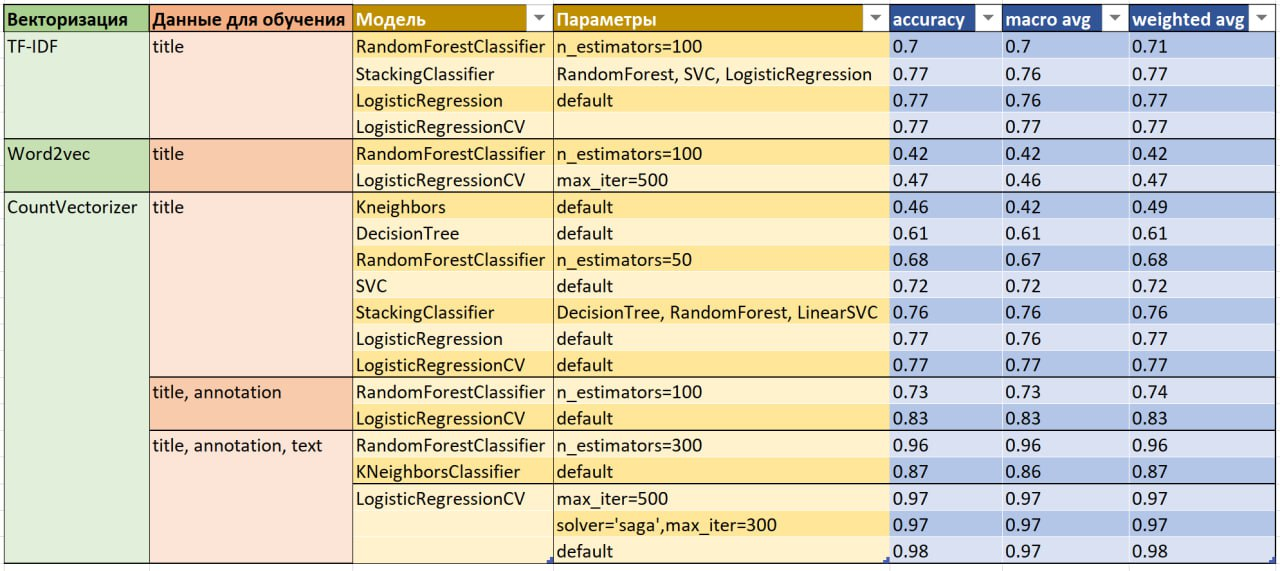

In [374]:
from IPython.display import Image, display

display(Image('classif_table.jpg', width=800))